In [2]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('./data/digit/train.csv')
test = pd.read_csv('./data/digit/test.csv')


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = train.iloc[:, 0]
X_train = train.iloc[:, 1:]

In [8]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Визуализируем исходные данные

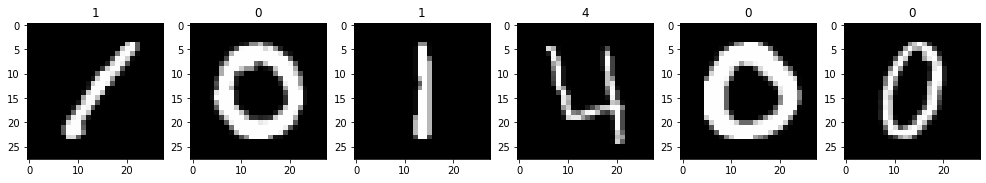

In [16]:
fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(X_train[0:6].to_numpy().reshape(6,28,28), 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_train[i - 1]);

In [22]:
# центрируем данные

X_mean = X_train.mean(axis=0)
X_train -= X_mean

In [23]:
# матрица ковариации признаков
cov = np.dot(X_train.T, X_train) / X_train.shape[0]

In [24]:
U, S, _ = np.linalg.svd(cov)

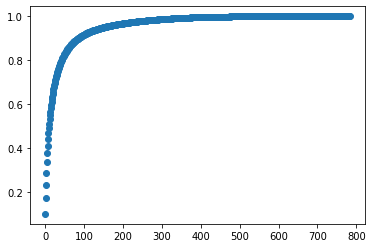

In [25]:
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [26]:
S_thr = 0.75  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=32 S=0.751


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=4)

In [29]:
pca = PCA(n_components = n_comp, whiten=True)

In [30]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [31]:

X_train_pca = pca.transform(X_train)

In [32]:

X_train_pca.shape

(14406, 32)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [36]:
knn.fit(X_train,y_train)
y_test_predict = knn.predict(X_test)
y_test_predict[:10]

array([0, 2, 2, 6, 5, 3, 2, 9, 1, 1])

In [38]:
knn.score( X_test, y_test )

0.9538386783284742